In [1]:
#Libraries Needed#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#Importing data set we have imported Netflix Prize data from kaggle#
#There are 4 data sets in Netflix Prize Dataset we have uploaded only one all four can be uploaded and a better recommendation can be made#
#Only one data set is uploaded due to comp power limitations#  
netflix_dataset = pd.read_csv('combined_data_1.txt', header = None, names = ['Cust_ID','Rating',], usecols = [0,1,])

In [3]:
netflix_dataset.head()  #Printing 1st 5 readings#

,Cust_ID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
netflix_dataset.dtypes #Data type for values of netflix_dataset#
#Object means String data type#

Cust_ID     object
Rating     float64
dtype: object

In [5]:
#If the Rating value is shown as object(String) then the following instruction will convert it to float data type#
#Then grouped into the Rating column all in one#
netflix_dataset['Rating'] = netflix_dataset['Rating'].astype(float) 

In [6]:
netflix_dataset.dtypes #Its data type#

Cust_ID     object
Rating     float64
dtype: object

In [7]:
#To check the number of rows and columns of data we use the following instruction#
netflix_dataset.shape 

(24058263, 2)

In [8]:

#We are going to separate the ratings and customer id data in the netflix_daatset#
stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count']) 
#To Find no of people who have given different ratings of 1, 2, 3, 4, 5#

In [9]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [10]:
#to calculate no of movies in dataset#
movie_count = netflix_dataset.isnull().sum() 
#In netflix_dataset we see that movie id is associated with NaN in the ratings columns which is why we are checking for no of NaN to determine the no of movies#
movie_count

Cust_ID       0
Rating     4499
dtype: int64

In [11]:
#To get the no of movies from movie_count and eliminating the Cust_ID value we use#
movie_count = netflix_dataset.isnull().sum()[1]#WE are using only the 1st index value#
movie_count

4499

In [12]:
#To determine the no of coustomers we use the netflix_dataset and we determine the no of customers who have given a rating #
#These are the ones who do not have an NaN value in the ratings columns#
#In case of repeation of ratings meanings same id multiple times is added to the no of customers#
#Which is why we use the nunique() func and remove repeation of Customer_ID#
coustomer_count = netflix_dataset['Cust_ID'].nunique()
coustomer_count
#The above value also contains movie_id which has to be eliminated#

475257

In [13]:
#By removing the movie_count from above customer_count we get the proper customer_count#
coustomer_count = netflix_dataset['Cust_ID'].nunique() - movie_count
coustomer_count

470758

In [14]:
#To get the total no of ratings given by all coustomer for all the movies#
rating_count = netflix_dataset['Cust_ID'].count() - movie_count
#movie_count is subtracted to get proper rating_count#
rating_count

24053764

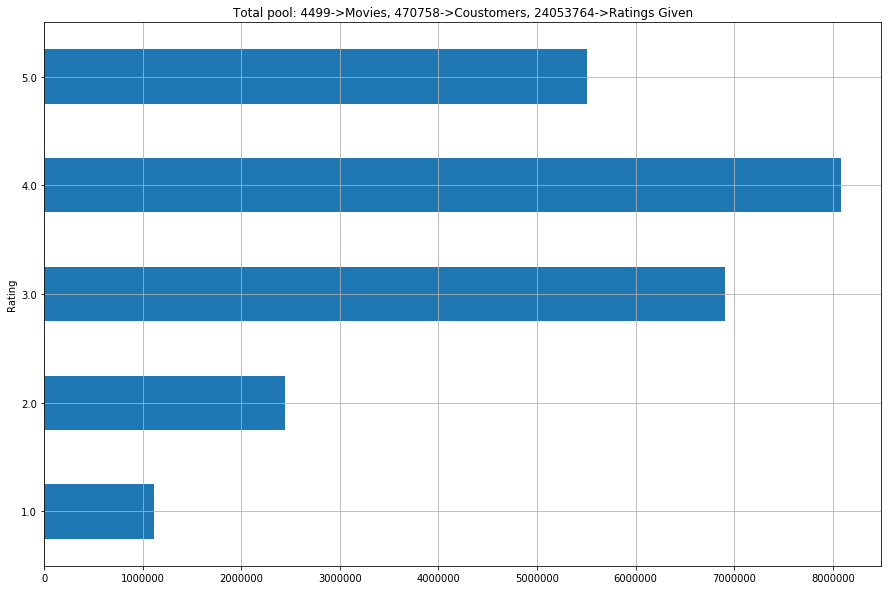

In [15]:
#Ploting a horizontal graph of generated data. Vertical bars are too big to plot#
ax = stars.plot(kind = 'barh', legend =False, figsize =(15,10)) #basrh->horizontal bar graph
plt.title(f'Total pool: {movie_count}->Movies, {coustomer_count}->Coustomers, {rating_count}->Ratings Given')
plt.grid(True)

In [16]:
#We are separating the movie_id column from rating column of netflix_dataset#
#Add another column that will have only movie id#
#We are basically going to find out the position of the movie_id in the netflix_dataset#
#We are calculating no of null values in ratings column in netflix_dataset#
df_nan = pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [17]:
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [18]:
#Extracting only the TRUE values from the df_nan#
df_nan = df_nan[df_nan['Rating']==True]

In [19]:
#To find no of rows in df_nan#
df_nan.shape

(4499, 1)

In [20]:
df_nan.head() #The positions of Movie ID in netflix_dataset stored in df_nan#
#0-547->Movie_Id_1, 548-693->Movie_ID_2, ........#

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [21]:
df_nan = df_nan.reset_index()#By using reset func we are getting the index values in a column#
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [22]:
#Creating a numpy array that will contain rating of movie 1 from o to 547, for 2 from 548 to 694 and so on#
movie_np=[]
movie_id=1
for i,j in zip(df_nan['index'][1:], df_nan['index'][:-1]): #zip func helps convert data in df_nan into a tuple#
   temp = np.full((1,i-j-1),movie_id)
   movie_np = np.append(movie_np, temp)
   movie_id+=1

#Account for last record and corresponding length
#numpy approach
last_record =  np.full((1,len(netflix_dataset) - df_nan.iloc[-1,0]-1),movie_id)
movie_np = np.append(movie_np, last_record)
print(f'movie numpy:{movie_np}')
print(f'Length: {len(movie_np)}')

movie numpy:[1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [23]:
x = zip(df_nan['index'][1:], df_nan['index'][:-1])#Ex of working of a tuple#

In [24]:
tuple(x) #Making it a tuple#
#Show that from o to 547 is movie_id1, from 548 to 694 is movie_id2 and so on till end of the df_nan#

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [25]:
temp = np.full((1,547),1) #working of full func#
temp #We are initailizing all the values as 1 from 1-547#

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [26]:
netflix_dataset = netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id'] = movie_np.astype(int)
netflix_dataset['Cust_ID'] = netflix_dataset['Cust_ID'].astype(int)
print("Now the dataset wioll look like: ")
netflix_dataset.head()

Now the dataset wioll look like: 


,Cust_ID,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [27]:
#We will remove all user ids that have rated less than 3 movies cause these ratings do not present us with enough feedback#
#We will also eliminate those movies which have been rated only by few users#
f=['count','mean']

In [28]:
#Grouping of the no of ratings given to each movie and the mean of all ratings#
dataset_movie_summary = netflix_dataset.groupby('Movie_Id')['Rating'].agg(f)
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [29]:
#Storing all Movie_Id indexes in data_movie_summary and all the index values are converted to int and stored#
dataset_movie_summary.index = dataset_movie_summary.index.map(int)

In [30]:
#Creating a benchmark basically by these statements we are elliminating the poor reviews posted and are considering
#only the positive reviews
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0) #Do not take 0.5 it will divide the table into 2 parts#
#The data is divided into a 70:30 ratio by the quantile func#
movie_benchmark#By taking 0.7 we are dividing the table by 70% in  the count column#

1799.0

In [31]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [32]:
#Removing movies with less rating#
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [33]:
dataset_cust_summary = netflix_dataset.groupby('Cust_ID')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_ID,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [34]:
dataset_cust_summary.index = dataset_cust_summary.index.map(int)

In [35]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [36]:
#Removing inactive users#
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count']>cust_benchmark].index
drop_cust_list

Int64Index([      6,       7,      79,      97,     134,     169,     183,
                188,     195,     199,
            ...
            2649308, 2649328, 2649331, 2649335, 2649336, 2649370, 2649378,
            2649388, 2649426, 2649429],
           dtype='int64', name='Cust_ID', length=141167)

In [37]:
#We will remove all movie and customer below benchmark
print('The Original dataframe has: ',netflix_dataset.shape,'shape')

The Original dataframe has:  (24053764, 3) shape


In [38]:
# ~ represents elimination, the movies with low rating and inactive users are removed from netflix_dataset#
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_ID'].isin(drop_cust_list)]
print('After triming the shape is : {}',format(netflix_dataset.shape))

After triming the shape is : {} (5405843, 3)


In [39]:
netflix_dataset.head()

,Cust_ID,Rating,Movie_Id
695,1025579,4.0,3
702,1436762,3.0,3
707,975874,5.0,3
715,2519847,5.0,3
720,1995318,3.0,3


In [40]:
#We now prepare the dataset for SVD(Singular Value Decomposition Algoritham) and it takes matrix as input#
#so for ip we will convert dataset into sparse matrix#
df_p = pd.pivot_table(netflix_dataset, values='Rating', index='Cust_ID', columns='Movie_Id')
#pivot_table func helps convert the data structure into a sparse matrix#
print(df_p.shape)

(328214, 1350)


In [41]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Importing movie_titles file#
df_title = pd.read_csv('movie_titles.csv', encoding='ISO-8859-1', header=None, names=['Movie_Id', 'Year','Name'])
#We use encoding because in movie_titles file movies name can include certain symbols like $, & which is why we use the encoding to recognise these symbols#
#header is equal to none to ignore the 1st column reading of movie_titles#
df_title.set_index('Movie_Id', inplace=True)

In [43]:
df_title.head(20)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [44]:
#Helps insatll the surprise package#
#pip install scikit-surprise

In [45]:
#Libraries needed to build model#
import math
import re
from scipy.sparse import csr_matrix
import seaborn as sns
from surprise import Reader, Dataset, SVD
# SVD package helps implement svd algorithm#
# Dataset package helps read the above data because svd cannot read it in its present form# 
from surprise.model_selection import cross_validate
# cross_validate helps determine the crossvalidation of dataset#

In [46]:
#helps read the dataset for svd algorithm# 
reader = Reader()

In [47]:
#ensures that model is built only on 1st 100 data rows for quiker run time#
data = Dataset.load_from_df(netflix_dataset[['Cust_ID','Movie_Id','Rating']][:100], reader)

In [48]:
#Creating svd algorithm#
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3, verbose=True) 
#csv can vary from 5-10#
#while training the error obtained by the svd algo is displayed by RMSE ->Root Mean square Error and MAE ->Mean Absolute Error#
#first the error is calculated then the square root of error is calculated and stored in root mean square error#
#cross_validate uses K-Fold Algo and divides the given data set into 3 folds#
#for 1st fold 1,2,3#
#verbose = 'True" helps print the o/p #

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0626  1.0227  1.0448  1.0434  0.0163  
MAE (testset)     0.9065  0.8475  0.8879  0.8806  0.0246  
Fit time          0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([1.06258682, 1.02270986, 1.04478569]),
 'test_mae': array([0.90649978, 0.84754845, 0.88785254]),
 'fit_time': (0.009995222091674805,
  0.007996559143066406,
  0.010994434356689453),
 'test_time': (0.0009989738464355469, 0.0, 0.0009987354278564453)}

In [49]:
netflix_dataset.head()

,Cust_ID,Rating,Movie_Id
695,1025579,4.0,3
702,1436762,3.0,3
707,975874,5.0,3
715,2519847,5.0,3
720,1995318,3.0,3


In [50]:
#We use user_712664 and try to recommend some movies based on past data#
dataset_712664 = netflix_dataset[(netflix_dataset['Cust_ID']==712664)&(netflix_dataset['Rating']==5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664

Series([], Name: Name, dtype: object)

In [51]:
user_712664 = df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [52]:
#we are going to set the movie_id as a column#
user_712664 = user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [53]:
#Removing all the movies listed in the drop_movie_list from the recommended list#
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [54]:
#We will now train our algorithm with the whole dataset#
data = Dataset.load_from_df(netflix_dataset[['Cust_ID','Movie_Id','Rating']], reader)

In [55]:
#building the trainset using surprise package#
trainset = data.build_full_trainset()#this will modify our data into a training set to be passed into svd model#
svd.fit(trainset)#this trains our model on top of our dataset#

In [56]:
#Now we will try to predict our model#
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
#lambda is an anonyamous fuc#
#we use est func to get recomendation score#
user_712664 = user_712664.drop('Movie_Id',axis=1)
#We are now droping the Movie_Id column from the dataset#

C:\Users\Admin-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
user_712664 = user_712664.sort_values('Estimate_Score')
print(user_712664.head(10))

        Year                                         Name  Estimate_Score
3020  2003.0                            House of the Dead        1.992091
3566  2004.0  Starship Troopers 2: Hero of the Federation        2.195530
4254  2002.0                                        Gerry        2.330258
1099  2000.0                            Dr. T & the Women        2.347168
3504  2001.0                          Freddy Got Fingered        2.527575
2674  2002.0                                      Solaris        2.529463
2268  2003.0                                People I Know        2.529780
1770  2004.0                                A Dirty Shame        2.531287
4172  1998.0     From Dusk Till Dawn 2: Texas Blood Money        2.561139
288   1998.0                                 The Avengers        2.564991


In [58]:
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

        Year                     Name  Estimate_Score
3455  2004.0           Lost: Season 1        4.680594
4426  2001.0  The West Wing: Season 3        4.601440
4237  2000.0                Inu-Yasha        4.574193
773   2003.0       Foyle's War: Set 2        4.562636
3957  2003.0           Monk: Season 2        4.532181
2113  2002.0                  Firefly        4.514897
2018  2004.0         Samurai Champloo        4.512404
2547  2000.0  Gilmore Girls: Season 1        4.490731
3022  1973.0                 Upstairs        4.482160
1946  2002.0  Gilmore Girls: Season 3        4.480649
